In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("profiling_results/")
import matplotlib.pyplot as plt
import pstats
import io
import snakeviz

In [2]:
# load all cProfile profiling results from profiling_results/epoch_*.prof where * is a number ranging from 0 to 499 using pstats.Stats
# and concatenate them into a single DataFrame
output_stream = io.StringIO()
total_epochs = pstats.Stats(stream=output_stream)

for i in range(500):
    epoch = pstats.Stats("profiling_results/epoch_{}.prof".format(i))
    epoch.strip_dirs()
    if i == 0:
        total_epochs = epoch
    else:
        total_epochs.add(epoch)

# output total_epochs to a file
total_epochs.dump_stats("profiling_results/total_epochs.prof")

In [10]:
def average(stats, count):
    stats.total_calls /= count
    stats.prim_calls /= count
    stats.total_tt /= count

    for func, source in stats.stats.items():
        cc, nc, tt, ct, callers = source
        stats.stats[func] = ( cc/count, nc/count, tt/count, ct/count, callers )

    return stats

# average the profiling results over all epochs
average_epochs = average(total_epochs, 500)
average_epochs.sort_stats("cumulative")
average_epochs.print_stats(r".*(forward|backward|propagate).*")

Sun Jan 19 21:31:07 2025    profiling_results/epoch_0.prof
Sun Jan 19 21:32:04 2025    profiling_results/epoch_1.prof
Sun Jan 19 21:32:58 2025    profiling_results/epoch_2.prof
Sun Jan 19 21:33:47 2025    profiling_results/epoch_3.prof
Sun Jan 19 21:34:57 2025    profiling_results/epoch_4.prof
Sun Jan 19 21:36:03 2025    profiling_results/epoch_5.prof
Sun Jan 19 21:37:04 2025    profiling_results/epoch_6.prof
Sun Jan 19 21:38:03 2025    profiling_results/epoch_7.prof
Sun Jan 19 21:39:05 2025    profiling_results/epoch_8.prof
Sun Jan 19 21:40:08 2025    profiling_results/epoch_9.prof
Sun Jan 19 21:41:13 2025    profiling_results/epoch_10.prof
Sun Jan 19 21:42:22 2025    profiling_results/epoch_11.prof
Sun Jan 19 21:43:21 2025    profiling_results/epoch_12.prof
Sun Jan 19 21:44:57 2025    profiling_results/epoch_13.prof
Sun Jan 19 21:45:59 2025    profiling_results/epoch_14.prof
Sun Jan 19 21:46:51 2025    profiling_results/epoch_15.prof
Sun Jan 19 21:47:40 2025    profiling_results/epoc

In [7]:
# use regular expression to get only the function names that contains "(forward)" or "(backward)" in their names
total_epochs.print_stats(r".*(forward|backward|propagate).*")

Sun Jan 19 21:31:07 2025    profiling_results/epoch_0.prof
Sun Jan 19 21:32:04 2025    profiling_results/epoch_1.prof
Sun Jan 19 21:32:58 2025    profiling_results/epoch_2.prof
Sun Jan 19 21:33:47 2025    profiling_results/epoch_3.prof
Sun Jan 19 21:34:57 2025    profiling_results/epoch_4.prof
Sun Jan 19 21:36:03 2025    profiling_results/epoch_5.prof
Sun Jan 19 21:37:04 2025    profiling_results/epoch_6.prof
Sun Jan 19 21:38:03 2025    profiling_results/epoch_7.prof
Sun Jan 19 21:39:05 2025    profiling_results/epoch_8.prof
Sun Jan 19 21:40:08 2025    profiling_results/epoch_9.prof
Sun Jan 19 21:41:13 2025    profiling_results/epoch_10.prof
Sun Jan 19 21:42:22 2025    profiling_results/epoch_11.prof
Sun Jan 19 21:43:21 2025    profiling_results/epoch_12.prof
Sun Jan 19 21:44:57 2025    profiling_results/epoch_13.prof
Sun Jan 19 21:45:59 2025    profiling_results/epoch_14.prof
Sun Jan 19 21:46:51 2025    profiling_results/epoch_15.prof
Sun Jan 19 21:47:40 2025    profiling_results/epoc

In [36]:
epoch = pstats.Stats("profiling_results/epoch_0.prof")
epoch.strip_dirs()
#epoch.sort_stats("cumulative")
#epoch.print_stats(r".*(forward|backward|propagate).*")
epoch.print_stats()

Sun Jan 19 21:31:07 2025    profiling_results/epoch_0.prof

         20198 function calls (19666 primitive calls) in 46.932 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:389(parent)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1017(_handle_fromlist)
        8    0.000    0.000    0.000    0.000 _collections_abc.py:664(__contains__)
        2    0.000    0.000    0.000    0.000 functools.py:404(__get__)
        1    0.000    0.000    0.000    0.000 __init__.py:383(__getattr__)
        1    0.000    0.000    0.000    0.000 __init__.py:390(__getitem__)
        2    0.000    0.000    0.000    0.000 __init__.py:47(create_string_buffer)
        4    0.000    0.000    0.000    0.000 _weakrefset.py:16(__init__)
        4    0.000    0.000    0.000    0.000 _weakrefset.py:20(__enter__)
        4    0.000    0.000    0.000

In [49]:
for i in range(500):
    result = io.StringIO()
    epoch = pstats.Stats("profiling_results/epoch_{}.prof".format(i), stream=result)
    epoch.strip_dirs()

    funcs = []
    for func, source in epoch.stats.items():
        cc, nc, tt, ct, callers = source
        funcs.append((func, nc, tt, ct))

    df = pd.DataFrame(funcs, columns=["function", "nc", "tt", "ct"])
    
    # output the df to a csv file
    df.to_csv("profiling_results/epoch_{}.csv".format(i), index=False)
    print("epoch_{}.csv".format(i))

epoch_0.csv
epoch_1.csv
epoch_2.csv
epoch_3.csv
epoch_4.csv
epoch_5.csv
epoch_6.csv
epoch_7.csv
epoch_8.csv
epoch_9.csv
epoch_10.csv
epoch_11.csv
epoch_12.csv
epoch_13.csv
epoch_14.csv
epoch_15.csv
epoch_16.csv
epoch_17.csv
epoch_18.csv
epoch_19.csv
epoch_20.csv
epoch_21.csv
epoch_22.csv
epoch_23.csv
epoch_24.csv
epoch_25.csv
epoch_26.csv
epoch_27.csv
epoch_28.csv
epoch_29.csv
epoch_30.csv
epoch_31.csv
epoch_32.csv
epoch_33.csv
epoch_34.csv
epoch_35.csv
epoch_36.csv
epoch_37.csv
epoch_38.csv
epoch_39.csv
epoch_40.csv
epoch_41.csv
epoch_42.csv
epoch_43.csv
epoch_44.csv
epoch_45.csv
epoch_46.csv
epoch_47.csv
epoch_48.csv
epoch_49.csv
epoch_50.csv
epoch_51.csv
epoch_52.csv
epoch_53.csv
epoch_54.csv
epoch_55.csv
epoch_56.csv
epoch_57.csv
epoch_58.csv
epoch_59.csv
epoch_60.csv
epoch_61.csv
epoch_62.csv
epoch_63.csv
epoch_64.csv
epoch_65.csv
epoch_66.csv
epoch_67.csv
epoch_68.csv
epoch_69.csv
epoch_70.csv
epoch_71.csv
epoch_72.csv
epoch_73.csv
epoch_74.csv
epoch_75.csv
epoch_76.csv
epoch_77.

In [51]:
# concatenate all the csv files into a single DataFrame
dfs = []

for i in range(500):
    df = pd.read_csv("profiling_results/epoch_{}.csv".format(i))
    df["epoch"] = i
    dfs.append(df)

concat_df = pd.concat(dfs)
concat_df

,function,nc,tt,ct,epoch
0,"('<frozen importlib._bootstrap>', 389, 'parent')",1,1.700000e-06,2.400000e-06,0
1,"('<frozen importlib._bootstrap>', 1017, '_hand...",3,5.500000e-06,8.000000e-06,0
2,"('_collections_abc.py', 664, '__contains__')",8,4.700000e-06,7.800000e-06,0
3,"('functools.py', 404, '__get__')",2,1.110000e-05,1.240000e-05,0
4,"('__init__.py', 383, '__getattr__')",1,3.600000e-06,1.310000e-05,0
...,...,...,...,...,...
243,"('~', 0, '<built-in method sys.audit>')",2,7.000000e-07,7.000000e-07,499
244,"('~', 0, '<built-in method __new__ of type obj...",50,9.010000e-05,9.010000e-05,499
245,"('~', 0, '<built-in method unicodedata.east_as...",2168,2.661000e-04,2.661000e-04,499
246,"('~', 0, ""<method 'acquire' of '_multiprocessi...",14,4.330000e-05,4.330000e-05,499


In [54]:
# filter the DataFrame to get only the functions that contains "(forward)" or "(backward)" in their names
filtered_df = concat_df.copy()
filtered_df = filtered_df[filtered_df["function"].str.contains(r".*(forward|backward|propagate).*")]
filtered_df

C:\Users\Xsper\AppData\Local\Temp\ipykernel_17936\547990293.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = filtered_df[filtered_df["function"].str.contains(r".*(forward|backward|propagate).*")]


,function,nc,tt,ct,epoch
39,"('_tensor.py', 429, 'backward')",3,0.000047,27.969466,0
48,"('linear.py', 113, 'forward')",152,0.001276,3.176530,0
56,"('activation.py', 101, 'forward')",24,0.000136,0.346708,0
102,"('activation.py', 774, 'forward')",32,0.000150,0.452031,0
103,"('loss.py', 535, 'forward')",8,0.000036,0.006871,0
...,...,...,...,...,...
195,"('model_att.py', 149, 'forward')",4,0.804889,24.927666,499
196,"('dehnn_layers.py', 49, 'forward')",12,3.175439,13.748822,499
198,('torch_geometric.nn.conv.simple_conv_SimpleCo...,48,0.693412,6.482313,499
199,('torch_geometric.nn.conv.simple_conv_SimpleCo...,48,0.002231,0.849579,499


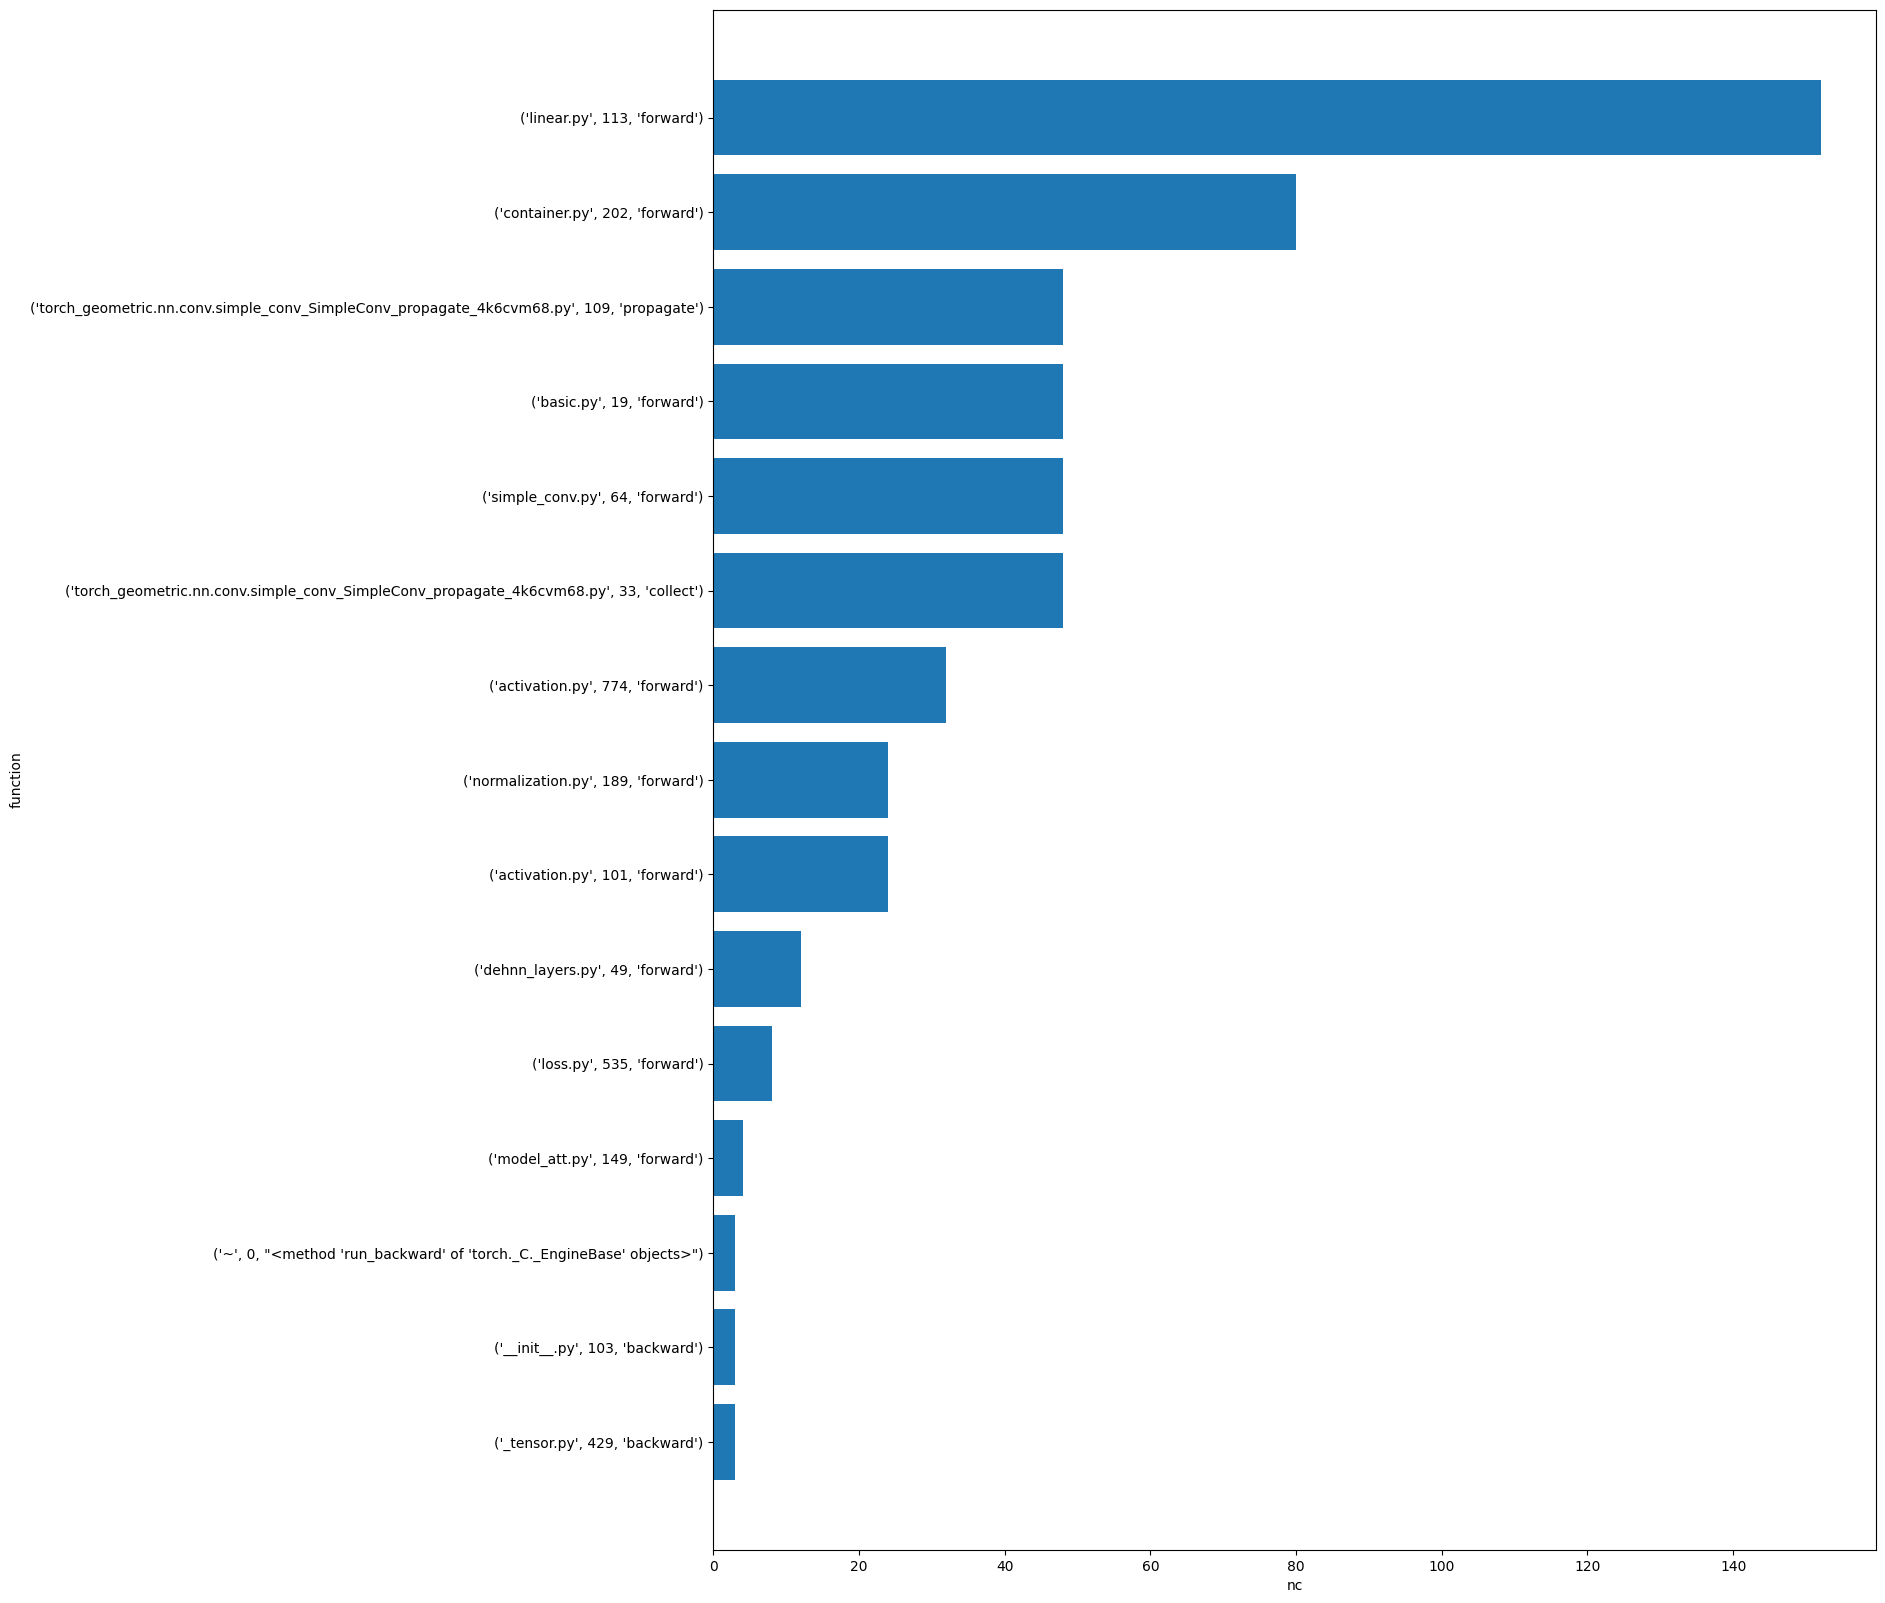

In [87]:
# draw a horizontal barplot of the nc column of the filtered DataFrame in ascending order
filtered_df.sort_values("nc", inplace=True)
plt.figure(figsize=(15, 20))
plt.barh(filtered_df["function"], filtered_df["nc"])
plt.xlabel("nc")
plt.ylabel("function")
plt.show()